In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [18, 10]



In [2]:
# Importing datasets 
caseDF = pd.read_csv('../outputs/case_processed.csv',parse_dates=['submission_date'])
X_unprocessed = pd.read_csv('../outputs/train2_state.csv',parse_dates=['date_implement'])

# 1. Generating Case Metrics as predictors of trend 

## Method 

Pick date and make Y's 
__Table 1__

|Policy|Metric Change|State| Date|__15 Day Later Date__|
|-|-|-|-|-|
|School Closing |+2|Maryland|__22 December 2021__|__10 January 2022__|






## 1.1 For One State

In [3]:
# Generating Rolling Metrics for each state 

In [4]:
states = caseDF['state'].unique().tolist()

In [5]:
caseDF.columns

Index(['Unnamed: 0', 'submission_date', 'state', 'new_case',
       'caseInterpolate_MA7', 'caseInterpolate_savitzky31_3',
       'caseInterpolate_gauss8', 'caseInterpolate_gauss3'],
      dtype='object')

In [6]:
state_picked = states[4]
print(f'State Picked : {state_picked}')
state_case_DF = caseDF[caseDF['state']==state_picked]

State Picked : HI


In [7]:
# Applying Zscore to cases for better trend visualisation
state_case_DF['new_case_zscore']=state_case_DF[['new_case']].apply(zscore)

/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/4023588793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_case_DF['new_case_zscore']=state_case_DF[['new_case']].apply(zscore)


In [8]:
# Select the state 
state_case_DF = caseDF[caseDF['state']==state_picked]

# Sort state cases by date
state_case_DF.sort_values(by=['submission_date'],inplace=True)

state_case_DF['new_case_zscore'] = state_case_DF[['new_case']].apply(zscore)

/usr/local/Caskroom/miniconda/base/envs/602/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/2613540006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_case_DF['new_case_zscore'] = state_case_DF[['new_case']].apply(zscore)


In [9]:
state_case_DF.columns

Index(['Unnamed: 0', 'submission_date', 'state', 'new_case',
       'caseInterpolate_MA7', 'caseInterpolate_savitzky31_3',
       'caseInterpolate_gauss8', 'caseInterpolate_gauss3', 'new_case_zscore'],
      dtype='object')

In [10]:
for interpolation_name in['caseInterpolate_MA7','caseInterpolate_gauss8','caseInterpolate_gauss3']:

    for window_size in [7,14,21,28]:
        print(window_size)

        state_case_DF[f'{interpolation_name}_{window_size}_trend'] = np.sign(state_case_DF[f'{interpolation_name}']
                                                             .rolling(window=window_size)
                                                             .mean()
                                                             .diff()
                                                             .fillna(0))



7
14
21
28
7
14
21
28
7
14
21
28


/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/2073060718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_case_DF[f'{interpolation_name}_{window_size}_trend'] = np.sign(state_case_DF[f'{interpolation_name}']


In [11]:
state_case_DF.columns

Index(['Unnamed: 0', 'submission_date', 'state', 'new_case',
       'caseInterpolate_MA7', 'caseInterpolate_savitzky31_3',
       'caseInterpolate_gauss8', 'caseInterpolate_gauss3', 'new_case_zscore',
       'caseInterpolate_MA7_7_trend', 'caseInterpolate_MA7_14_trend',
       'caseInterpolate_MA7_21_trend', 'caseInterpolate_MA7_28_trend',
       'caseInterpolate_gauss8_7_trend', 'caseInterpolate_gauss8_14_trend',
       'caseInterpolate_gauss8_21_trend', 'caseInterpolate_gauss8_28_trend',
       'caseInterpolate_gauss3_7_trend', 'caseInterpolate_gauss3_14_trend',
       'caseInterpolate_gauss3_21_trend', 'caseInterpolate_gauss3_28_trend'],
      dtype='object')

<AxesSubplot:xlabel='submission_date'>

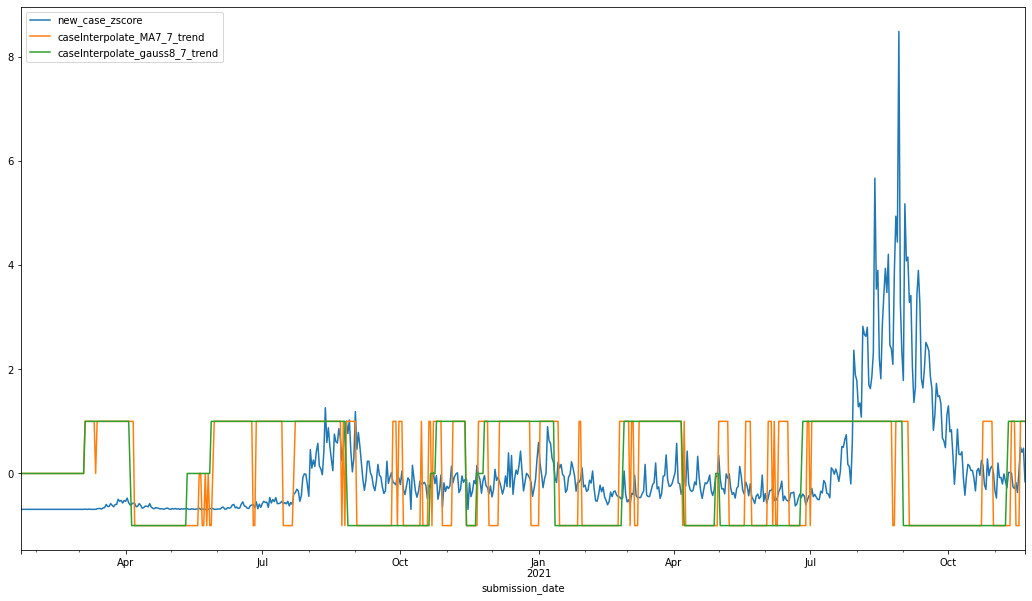

In [12]:
state_case_DF.plot(x='submission_date',y=['new_case_zscore',
                                          'caseInterpolate_MA7_7_trend',
                                          'caseInterpolate_gauss8_7_trend'])

# 1.1 For All States

In [13]:
def polyf(seri):
    return np.polyfit(seri.index.values, seri.values, 1)[0]

In [14]:
state_case_DF

,Unnamed: 0,submission_date,state,new_case,caseInterpolate_MA7,caseInterpolate_savitzky31_3,caseInterpolate_gauss8,caseInterpolate_gauss3,new_case_zscore,caseInterpolate_MA7_7_trend,caseInterpolate_MA7_14_trend,caseInterpolate_MA7_21_trend,caseInterpolate_MA7_28_trend,caseInterpolate_gauss8_7_trend,caseInterpolate_gauss8_14_trend,caseInterpolate_gauss8_21_trend,caseInterpolate_gauss8_28_trend,caseInterpolate_gauss3_7_trend,caseInterpolate_gauss3_14_trend,caseInterpolate_gauss3_21_trend,caseInterpolate_gauss3_28_trend
2680,1988,2020-01-22,HI,0,NaN,0.000000,0,0,-0.688555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2681,32985,2020-01-23,HI,0,NaN,0.000000,0,0,-0.688555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2682,4103,2020-01-24,HI,0,NaN,0.000000,0,0,-0.688555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2683,5684,2020-01-25,HI,0,NaN,0.000000,0,0,-0.688555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2684,4851,2020-01-26,HI,0,NaN,0.000000,0,0,-0.688555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,4907,2021-11-17,HI,133,98.285714,959.818863,126,133,0.047071,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
3346,523,2021-11-18,HI,216,110.857143,946.806972,127,143,0.506147,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
3347,32149,2021-11-19,HI,198,121.142857,979.928470,128,151,0.406588,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3348,3626,2021-11-20,HI,212,140.285714,1025.528211,129,156,0.484022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
FULL_DATA = []
state_picked = states[4]

for state_picked in states:
    print(f'State Picked : {state_picked}')
    
    
    # Select the state 
    state_case_DF = caseDF[caseDF['state']==state_picked]

    # Sort state cases by date
    state_case_DF.sort_values(by=['submission_date'],inplace=True)

    state_case_DF['new_case_zscore'] = state_case_DF[['new_case']].apply(zscore)
    
    for interpolation_name in['caseInterpolate_MA7','caseInterpolate_gauss8','caseInterpolate_gauss3']:

        for window_size in [14,21,28]:
            state_case_DF[f'Y_TREND_{interpolation_name}_{window_size}'] = np.sign(state_case_DF[f'{interpolation_name}'].rolling(window=window_size)
                                                                 .mean()
                                                                 .diff()
                                                                 .fillna(0))
            
            state_case_DF[f'Y_TRENDQUANT_{interpolation_name}_{window_size}'] = state_case_DF[f'{interpolation_name}'].rolling(window=window_size).mean().diff().fillna(0)
            
            
            state_case_DF[f'Y_SLOPE_{interpolation_name}_{window_size}'] = state_case_DF[f'{interpolation_name}'].rolling(25, min_periods=2).apply(polyf, raw=False)
            

    
    FULL_DATA.append(state_case_DF)
    



State Picked : UT


/usr/local/Caskroom/miniconda/base/envs/602/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/3321949326.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_case_DF['new_case_zscore'] = state_case_DF[['new_case']].apply(zscore)
/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/3321949326.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

State Picked : CO
State Picked : AR
State Picked : AS
State Picked : HI
State Picked : AK
State Picked : TX
State Picked : OK
State Picked : GA
State Picked : MA
State Picked : MP
State Picked : PR
State Picked : KS
State Picked : FL
State Picked : PW
State Picked : WV
State Picked : NYC
State Picked : NM
State Picked : PA
State Picked : IA
State Picked : TN
State Picked : OH
State Picked : RMI
State Picked : NY
State Picked : SD
State Picked : ND
State Picked : CA
State Picked : IL
State Picked : DE
State Picked : WI
State Picked : GU
State Picked : NE
State Picked : IN
State Picked : CT
State Picked : NV
State Picked : NC
State Picked : MO
State Picked : MS
State Picked : ME
State Picked : VT
State Picked : ID
State Picked : AL
State Picked : MI
State Picked : VI
State Picked : NH
State Picked : MD
State Picked : WA
State Picked : MT
State Picked : LA
State Picked : DC
State Picked : NJ
State Picked : KY
State Picked : WY
State Picked : MN
State Picked : FSM
State Picked : AZ
State P

In [16]:
NEW_caseDF = pd.concat(FULL_DATA)

In [17]:
NEW_caseDF

,Unnamed: 0,submission_date,state,new_case,caseInterpolate_MA7,caseInterpolate_savitzky31_3,caseInterpolate_gauss8,caseInterpolate_gauss3,new_case_zscore,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,3245,2020-01-22,UT,0,NaN,0.000000,0,0,-0.932252,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN
1,2961,2020-01-23,UT,0,NaN,0.000000,0,0,-0.932252,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,5068,2020-01-24,UT,0,NaN,0.000000,0,0,-0.932252,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,518,2020-01-25,UT,0,NaN,0.000000,0,0,-0.932252,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,4498,2020-01-26,UT,0,NaN,0.000000,0,0,-0.932252,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40195,29049,2021-11-17,OR,976,781.428571,959.818863,770,781,0.660326,-1.0,-18.204082,-13.538462,-1.0,-16.394558,-13.538462,-1.0,-13.933673,-13.538462,-1.0,-14.714286,-14.061538,-1.0,-13.904762,-14.061538,-1.0,-12.750000,-14.061538,-1.0,-16.714286,-14.743846,-1.0,-15.142857,-14.743846,-1.0,-12.428571,-14.743846
40196,16726,2021-11-18,OR,1148,945.428571,946.806972,761,721,0.942312,-1.0,-7.244898,-14.253626,-1.0,-6.761905,-14.253626,-1.0,-9.321429,-14.253626,-1.0,-14.285714,-14.181538,-1.0,-13.809524,-14.181538,-1.0,-12.750000,-14.181538,-1.0,-18.785714,-15.583846,-1.0,-17.238095,-15.583846,-1.0,-13.750000,-15.583846
40197,30899,2021-11-19,OR,1072,841.142857,979.928470,754,646,0.817714,-1.0,-12.204082,-14.336154,-1.0,-11.149660,-14.336154,-1.0,-14.653061,-14.336154,-1.0,-13.714286,-14.203077,-1.0,-13.619048,-14.203077,-1.0,-12.678571,-14.203077,-1.0,-21.500000,-16.708462,-1.0,-19.809524,-16.708462,-1.0,-15.714286,-16.708462
40198,19379,2021-11-20,OR,0,841.142857,1025.528211,750,577,-0.939777,-1.0,-12.204082,-13.983077,-1.0,-11.149660,-13.983077,-1.0,-9.112245,-13.983077,-1.0,-12.857143,-14.100000,-1.0,-13.238095,-14.100000,-1.0,-12.500000,-14.100000,-1.0,-24.285714,-18.044615,-1.0,-22.380952,-18.044615,-1.0,-17.857143,-18.044615




### FINAL TRAINING FORMAT

|State Profile Columns(Avg income, Avg education etc etc.)|Covid Profile Columns(Case peak Etc Etc)|Policy|Metric Change|Date of Implementation|15 Day Trend|30 Day trendquant|
|-|-|-|-|-|-|-|
|-|-|-|-|-|-|-|

# 2. Generate X and Y of the training Data
Now that we have the x and y, we merge all of the data into one table 

In [18]:
TRAINING_DATA_X_Y = pd.merge(X_unprocessed, 
                     NEW_caseDF,  
                     how='left', 
                     left_on=['date_implement','CEN_stateCode'], 
                     right_on = ['submission_date','state'])

/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_29366/19162131.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  TRAINING_DATA_X_Y = pd.merge(X_unprocessed,


In [19]:
TRAINING_DATA_X_Y.head()

,Unnamed: 0_x,Unnamed: 0_x,Unnamed: 0.1,date_implement,policy,metric_change,state_x,policy_type,Unnamed: 0_y,stateName,CEN_stateCode,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Unnamed: 0,CEN_Unnamed: 0.1,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation,Unnamed: 0_y,submission_date,state_y,new_case,caseInterpolate_MA7,caseInterpolate_savitzky31_3,caseInterpolate_gauss8,caseInterpolate_gauss3,new_case_zscore,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,0,0,0,2020-03-13,C1_School closing,1.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.2,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,32839.0,2020-03-13,AK,1.0,0.142857,-21.030578,2.0,0.0,-0.752799,1.0,0.010204,0.001319,1.0,0.006803,0.001319,1.0,0.005102,0.001319,1.0,0.142857,0.041538,1.0,0.095238,0.041538,1.0,0.071429,0.041538,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1,1,1,2020-03-16,C1_School closing,2.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.2,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,5015.0,2020-03-16,AK,0.0,0.142857,21.332012,3.0,1.0,-0.756350,1.0,0.010204,0.004615,1.0,0.006803,0.004615,1.0,0.005102,0.004615,1.0,0.214286,0.090000,1.0,0.142857,0.090000,1.0,0.107143,0.090000,1.0,0.071429,0.017692,1.0,0.047619,0.017692,1.0,0.035714,0.017692
2,2,2,2,2020-03-12,C2_Workplace closing,1.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.2,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,3062.0,2020-03-12,AK,0.0,0.000000,-9.073048,1.0,0.0,-0.

In [20]:
# TRAINING_DATA_X_Y.to_csv('../outputs/trainXY.csv')

In [21]:
# TRAINING_DATA_X_Y

,Unnamed: 0_x,Unnamed: 0_x,Unnamed: 0.1,date_implement,policy,metric_change,state_x,policy_type,Unnamed: 0_y,stateName,CEN_stateCode,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Unnamed: 0,CEN_Unnamed: 0.1,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation,Unnamed: 0_y,submission_date,state_y,new_case,caseInterpolate_MA7,caseInterpolate_savitzky31_3,caseInterpolate_gauss8,caseInterpolate_gauss3,new_case_zscore,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,0,0,0,2020-03-13,C1_School closing,1.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.20,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,32839.0,2020-03-13,AK,1.0,0.142857,-21.030578,2.0,0.0,-0.752799,1.0,0.010204,0.001319,1.0,0.006803,0.001319,1.0,0.005102,0.001319,1.0,0.142857,0.041538,1.0,0.095238,0.041538,1.0,0.071429,0.041538,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1,1,1,2020-03-16,C1_School closing,2.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.20,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,5015.0,2020-03-16,AK,0.0,0.142857,21.332012,3.0,1.0,-0.756350,1.0,0.010204,0.004615,1.0,0.006803,0.004615,1.0,0.005102,0.004615,1.0,0.214286,0.090000,1.0,0.142857,0.090000,1.0,0.107143,0.090000,1.0,0.071429,0.017692,1.0,0.047619,0.017692,1.0,0.035714,0.017692
2,2,2,2,2020-03-12,C2_Workplace closing,1.0,Alaska,0,1.0,Alaska,AK,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,1.0,0.0,12.2,230.0,353.0,655.0,181.0,0.0,181.0,8.0,189.0,0.36,1.55,0.29,2.20,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0.0,0.0,0.0,0.0,3062.0,2020-03-12,AK,0.0,0.000000,-9.073048,1.0,0.0,